In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#SKLearn 16 | Random Forest Classification | Hutan Acak | Belajar Machine Learning Dasar

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.shape


(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Melihat distribusi pada kolom Quantity untuk mengetahui produk yang terjual

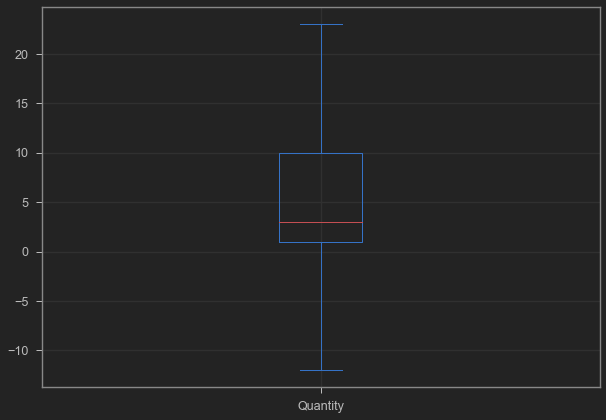

In [9]:
ax = df['Quantity'].plot.box(
    showfliers = False,
    grid = True,
    figsize = (10, 7)
)

ax.set_ylabel = ('Order Quantity')
ax.set_xlabel = ('Quantity Distribution')
plt.suptitle("")
plt.show()

#memiliki 0 - 10 paling banyak terjual
#memiliki nilai min 0 -(-10) kemungkinan kostumer meng cancel

In [10]:
#Lihat Informasi Dan Deskripsi Dari Kolom Quantity 
df['Quantity'].describe() #atau #pd.DataFrame(df['Quantity'].describe())

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [11]:
#menyingkirkan stok penjualan karena tidakmungkin transaksi penjualan minus
#tindakan #Filter Untuk Lihat Jumlah Data Dari Data Product Yang Quantity-Nya Hanya Besar Dari 0
df.loc[df['Quantity'] > 0]  #untuk melihat data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [12]:
df.loc[df['Quantity'] > 0].shape   #untuk melihat baris and kolom

(531285, 8)

In [13]:
#Update Data Pada Variabel Dataset Tersebut Berdasarkan Hasil Filter Data Yang Besar Dari 0
#UPDATE DATA TANPA MERUBAH DATA AWAL YAITU DENGAN MEMBUAT VARIABEL BARU

df_baru = df.loc[df['Quantity'] > 0]

# Time-Series Number Of Orders
### menghitung infois number atau banyaknya transaksi yg dilakukan setiaap bulannya
#### Melakukan Filter Data Berdasarkan Waktu Penjualan Product Tersebut. Kemudian Data Ini Kita Simpan Ke Dalam Variabel Baru (Di Group Berdasarkan Bulan (M))

In [14]:
monthly_orders_df = df_baru.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df

#output
#terdapat 13 bulan transaksi, dapat kita lihat pada bulan 12 terdapat penurunan
#disini meliat kenapa terjadi pengurangan atau penurunan

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

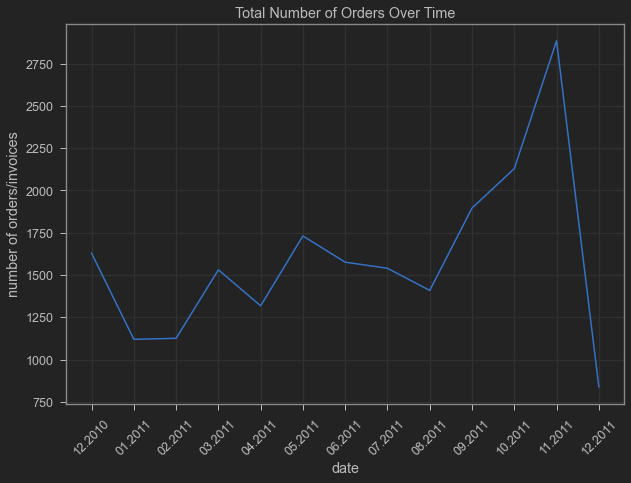

In [15]:
#Lihat Informasi Sebaran Data Product Berdasarkan Jumlah Product Dan Waktu Penjualan Ke Dalam Grafik
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders_df.index], 
    rotation=45
)

plt.show()




--kesimpulan dari grafik : terdapat peningkatan pada bulan 8 - 11 tahun 2011. 
--misal ini produk kita harus memperhatikan produk apa yang meningkat
--pada bulan 12 2011 terdapat penurunan yg sangat derastis (kendala) maka harus cek data pada bulan 12

In [16]:
#cek data bulan 12
# Filter Data Product Berdasarkan Tanggal Penjualan Yang Setelah Tanggal “2011-12-01” Sampai Saat Ini

invoice_dates = df_baru.loc[
    df_baru['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

In [17]:
#Lihat Tanggal Paling Min Dan Max Dari Variabel Data Product Yang Besar Dari Tanggal “2011-12-01”
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


In [18]:
#Cek Data Product Yang Berada Pada Tanggal “2011-12-01” Kebawah
df_baru.loc[df_baru['InvoiceDate'] < '2011-12-01'].shape

(506150, 8)

In [19]:
df_baru.shape

(531285, 8)

kesimpulan (531285, 9) data sebelum di filter
(506150, 8) data yang sudah di filter dibawah 2011-12-01 (karena data pada bulan 12 tidak lengkap)

In [20]:
#memfilter data dibawah bulan 2011-12-01 dan menyimpan di variabel data_baru
# bisa menmbuat variabel baru atau tetap, disini tetap mengunakan variabel yang sama
df_baru = df_baru.loc[df_baru['InvoiceDate'] < '2011-12-01']

In [21]:
#Grouping Terhadap Data Yang Telah Kita Filter Ini Dan Tampilkan Data Tersebut Dan Group Berdasarkan Bulan (M)
monthly_orders_df = df_baru.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df

#tidak tampil bulan 12 karena datanya sudah di filter

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
Freq: M, Name: InvoiceNo, dtype: int64

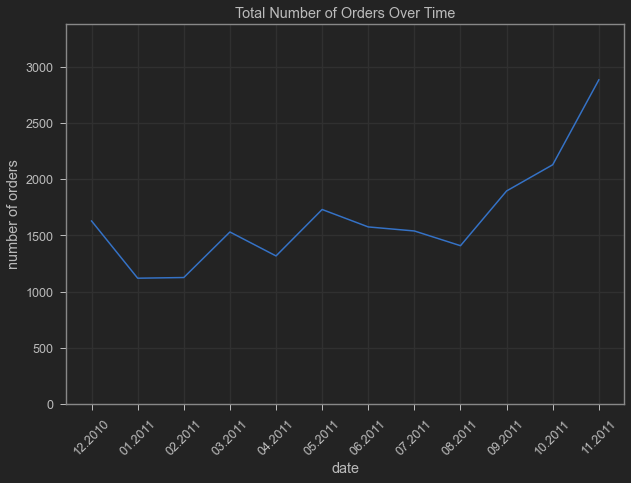

In [22]:
#Lihat Sebaran Terdapat Data Yang Telah Kita Filter Ini Ke Dalam Grafik
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders')
ax.set_title('Total Number of Orders Over Time')

ax.set_ylim([0, max(monthly_orders_df.values)+500])

plt.xticks(
    range(len(monthly_orders_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders_df.index], 
    rotation=45
)

plt.show()

grfik berbeda dengan yang awal karena data bulan 12 sudah difilter dan selanjutnya kita akan menghitung banyaknya keuntungan yg disapat dari penjualan tersebut (bulan 8-11 2011)

# Time-Series Revenue

In [23]:
#Menghitung Dan Menganalisa Keuntungan Product Berdasarkan Waktu. Jadi Pertama – Tama Kita Hitung Dulu Total Penjualan Product
#df_baru['sales'] = df_baru['Quantity'] * ['UnitPrice']
df_baru['Sales'] = df_baru['Quantity'] * df_baru['UnitPrice']

In [24]:
df_baru['Sales']


0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
516364     5.00
516365    11.90
516366    12.48
516367     7.95
516368     5.95
Name: Sales, Length: 506150, dtype: float64

In [25]:
#Filter Dan Hitung Data Tersebut Berdasarkan Tanggal Yang Di Group Berdasarkan Bulan Setiap Penjualan Product
monthly_revenue_df = df_baru.set_index('InvoiceDate')['Sales'].resample('M').sum()
monthly_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

kesimpulannya : terdapat penjualan tertinggi pada bulan 9-11

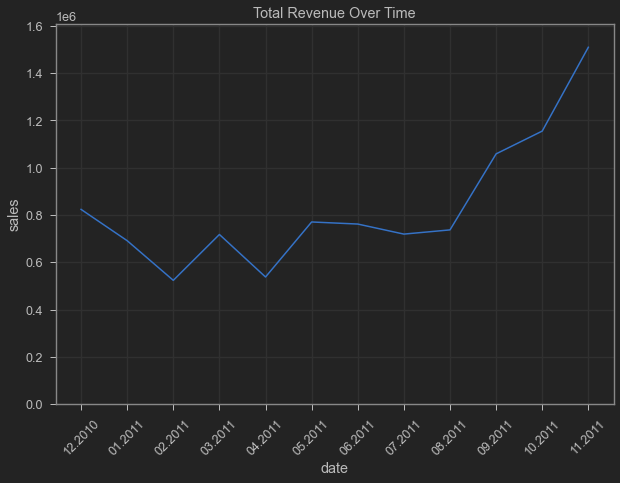

In [26]:
#Liat Sebaran Dari Penjualan Product Tersebut Ke Dalam Grafik
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

plt.xticks(
    range(len(monthly_revenue_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_revenue_df.index], 
    rotation=45
)

plt.show()

# Time-Series Repeat Customers
## selanjutnya melakukan analisas yg selalu Melakukan Pembelian Berulang 
#### Lihat Data Customer Yang Melakukan Pembelian Berulang Tiap Waktunya. Pertama – Tama Kita Group Data Tersebut Berdasarkan Nomor Dan Tanggal Invoice Lalu Hitung Total Pembelian Product Tersebut

In [27]:
#terdapat kolom baru yaitu sales yg tadi dibuat
#seles ini merupakan banyaknya penjualan yg terjadi
df_baru.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [28]:
#melakukan gruping datacustumer berdasarkan tanggal dan invoiceno
invoice_customer_df = df_baru.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()

In [29]:
#Lihat Informasi Variabel Data Yang Telah Kita Group Tersebut
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom


In [50]:
#Group Lagi Data Tersebut Untuk Melihat Banyaknya Transaksi Unik Tiap Bulannya

monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([

    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

#filtering pembelian lebih dari 1

monthly_repeat_customers_df



InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

pada bulan 11 paling banyak konsumem melakukan pembelian


In [ ]:

#mengambil seluruh konstumer yang mengambil transaksi tiap bulannya

#tujuannya melihat presentase dari banyaknya konsumen melakukan pembelian berulang
#Lihat Banyaknya Transaksi Keseluruhan Data Tersebut Berdasarkan Bulan Dan Customer

monthly_unique_customers_df = df_baru.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

In [ ]:
#Lihat Persentasi Pencapaian Product Yang Dibeli Berulang Oleh Customer Berdasarkan Bulan
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

In [ ]:
#Lihat Perbandingan Antara Data Keseluruhan Constumer Dengan Banyaknya Pembelian Oleh Customer Yang Sama Atau Berulang
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize=(10,7)
)

pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax=ax,
    grid=True
)


ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], 
    rotation=45
)

plt.show()

# Revenue From Repeat Customers
#### Menghitung Dan Menganalisa Banyaknya Keuntungan Yang Didapat Dari Pembelian Customer Yang Berulang. Pertama – Tama Kita Lakukan Grouping Terhadap Data Tersebut

In [31]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

In [32]:
#Hitung Persentase Setiap Product Yang Terjual Oleh Consumen Yang Sama
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0
monthly_rev_repeat_customers_df

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
Freq: M, Name: Sales, dtype: float64

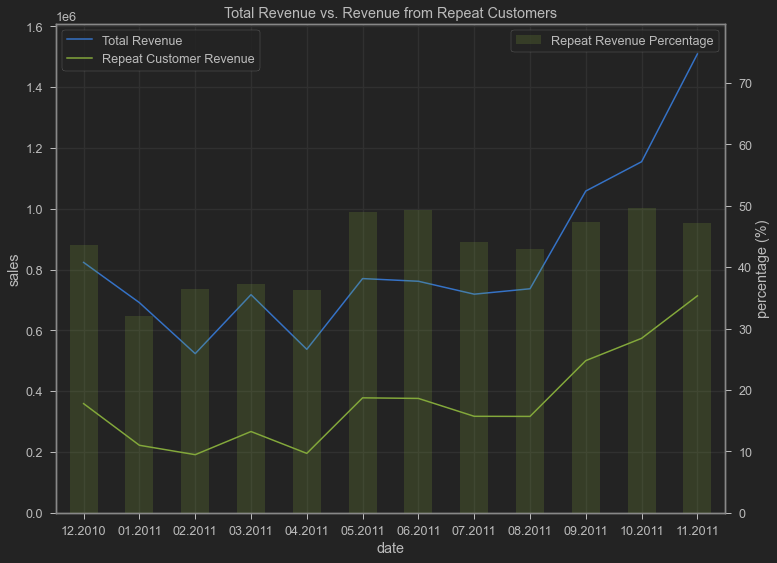

In [33]:
#Lihat Perbandingan Antara Keuntungan Seluruh Product Dengan Keuntungan Yang Dihasilkan Oleh Customer Berulang
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    grid=True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index
])

plt.show()

# Popular Items Over Time


In [34]:

#Lihat Product Yang Populer Dari Waktu Ke Waktu. Pertama – Tama Kita Lakukan Filter Terhadap Product Kita Dari Waktu Ke Waktu
date_item_df = pd.DataFrame(
    df_baru.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  C2              173
            DCGSSGIRL         1
            DOT              47
            M              3894
            POST           1262

[31701 rows x 1 columns]

In [35]:
#Ranking Setiap Product Yang Populer Tersebut Berdasarkan Total Penjualan
# Rank items by the last month sales
last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()

last_month_sorted_df

,InvoiceDate,StockCode,Quantity
0,2011-11-30,23084,14954
1,2011-11-30,84826,12551
2,2011-11-30,22197,12460
3,2011-11-30,22086,7908
4,2011-11-30,85099B,5909
...,...,...,...
2941,2011-11-30,84549,1
2942,2011-11-30,84527,1
2943,2011-11-30,90082B,1
2944,2011-11-30,90082D,1


In [36]:
#Ambil 5 Product Populer Untuk Sebagai Acuan Terhadap Penjualan Product Tersebut Dari Waktu Ke Waktu
# Regroup for top 5 items
date_item_df = pd.DataFrame(
    df_baru.loc[
        df_baru['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2460
            22197          2738
            84826           366
            85099B         2152
2011-01-31  22086            24
            22197          1824
            84826           480
            85099B         2747
2011-02-28  22086             5
            22197          2666
            84826            66
            85099B         3080
2011-03-31  22086            87
            22197          2803
            84826            60
            85099B         5282
2011-04-30  22086            13
            22197          1869
            84826             1
            85099B         2456
2011-05-31  22086            17
            22197          6849
            23084          1131
            85099B         3621
2011-06-30  22086           344
            22197          2095
            23084          1713
            84826             4
            85099B         3682
2011-07-31  22086           383
            22197          1876
            23084           318
            84826             2
            85099B         3129
2011-08-31  22086           490
            22197          5421
            23084          2267
            84826            72
            85099B         5502
2011-09-30  22086          2106
            22197          4196
            23084           680
            85099B         4401
2011-10-31  22086          3429
            22197          5907
            23084          6348
            84826            11
            85099B         5412
2011-11-30  22086          7908
            22197         12460
            23084         14954
            84826         12551
            85099B         5909

In [37]:
#Ubah Tampilan Perbandingan Tersebut Menjadi Tabel Sehingga Lebih Mudah Untuk Melakukan Analisa Terhadap Product Tersebut
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)

trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


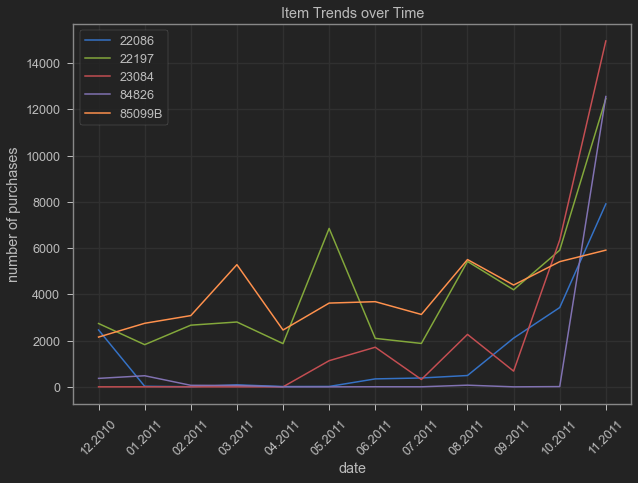

In [38]:
#Lakukan Perbandingan Terhadap Ke 5 Product Tersebut Ke Dalam Grafik

ax = pd.DataFrame(trending_itmes_df.values).plot(
    figsize=(10,7),
    grid=True,
)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(trending_itmes_df.index)), 
    [x.strftime('%m.%Y') for x in trending_itmes_df.index], 
    rotation=45
)

plt.show()

In [39]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [40]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506150 entries, 0 to 516368
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    506150 non-null  object        
 1   StockCode    506150 non-null  object        
 2   Description  505568 non-null  object        
 3   Quantity     506150 non-null  int64         
 4   InvoiceDate  506150 non-null  datetime64[ns]
 5   UnitPrice    506150 non-null  float64       
 6   CustomerID   380620 non-null  float64       
 7   Country      506150 non-null  object        
 8   Sales        506150 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 38.6+ MB


In [41]:
df_baru

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,United Kingdom,5.00
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,United Kingdom,11.90
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,United Kingdom,12.48
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,United Kingdom,7.95


In [42]:
#Declare feature vector and target variable
X = df_baru.drop(['CustomerID'], axis=1)

y = df_baru['CustomerID']

In [43]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [44]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((339120, 8), (167030, 8))

# Feature Engineering

In [45]:
# check data types in X_train

X_train.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
Sales                 float64
dtype: object

In [46]:
X_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
210104,555276,23299,FOOD COVER WITH BEADS SET 2,1,2011-06-01 17:28:00,7.46,United Kingdom,7.46
224134,556507,22730,ALARM CLOCK BAKELIKE IVORY,8,2011-06-13 09:55:00,3.75,France,30.00
112429,545895,85131B,BEADED CRYSTAL HEART GREEN ON STICK,3,2011-03-07 17:14:00,0.83,United Kingdom,2.49
311717,564315,84997C,CHILDRENS CUTLERY POLKADOT BLUE,1,2011-08-24 13:07:00,4.15,United Kingdom,4.15
234158,557502,20711,JUMBO BAG TOYS,2,2011-06-20 15:32:00,4.13,United Kingdom,8.26


In [47]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'A563187'

In [ ]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country', 'Sales'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)


# Check accuracy score 



In [ ]:
# periksa dan cetak jenis variabel x
print(type(x))
 
# mengubah x menjadi string and cetak
convert_x = "% s" % x
print(type(convert_x))